# Import Libraries

In [1]:
%%capture
!pip install ucimlrepo

In [2]:
import gdown

# Replace with your Google Drive shareable link
url = 'https://drive.google.com/file/d/12vVwZp09AQ8j-QgwgHtyecIEde6bHaiG/view?usp=sharing'

# Convert to the direct download link
file_id = url.split('/d/')[1].split('/')[0]
direct_url = f'https://drive.google.com/uc?id={file_id}'

# Download
gdown.download(direct_url, 'homoscedasticity.jpg', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=12vVwZp09AQ8j-QgwgHtyecIEde6bHaiG
To: /content/homoscedasticity.jpg
100%|██████████| 23.7k/23.7k [00:00<00:00, 27.3MB/s]


'homoscedasticity.jpg'

In [3]:
import copy

import numpy as np
import pandas as pd
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import tensorflow as tf

%matplotlib inline

plt.style.use('Solarize_Light2')

# Loading Dataset
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

In [5]:
X.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday


In [6]:
y.head(2)

,Functioning Day
0,Yes
1,Yes


# Processing Dataset

In [7]:
df = X.drop(["Date", "Holiday", "Seasons"], axis=1)

df.head(2)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0


In [8]:
# convert y target to boolboolean
df["Functioning Day"] = (y == "Yes").astype(np.int8)

df.head(2)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1


In [9]:
df_noon = df[df["Hour"].isin(range(10, 19))]
df_noon = df_noon.drop(["Hour"], axis=1)

# df_noon = df.drop(["Hour"], axis=1)

# Visualization

In [10]:
def plots(data):
  for label in data.columns[1:]:
      plt.scatter(data[label], data["Rented Bike Count"])
      plt.title(label)
      plt.xlabel(label)
      plt.ylabel("Rented Bike Count")
      plt.show()

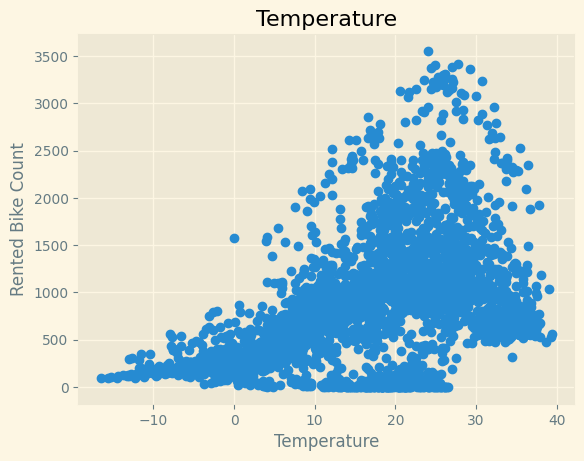

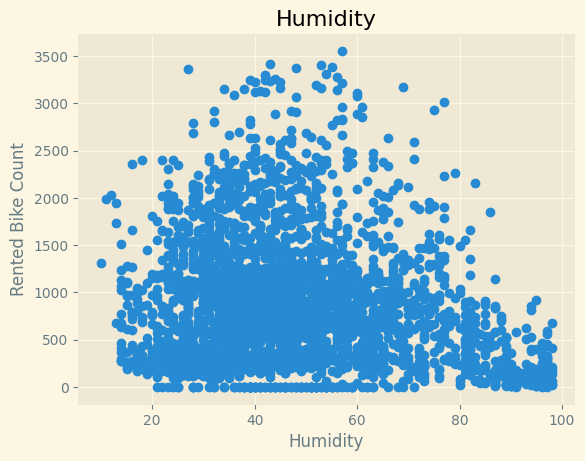

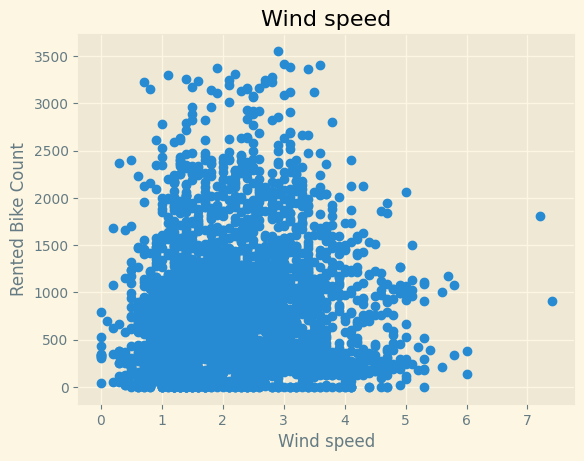

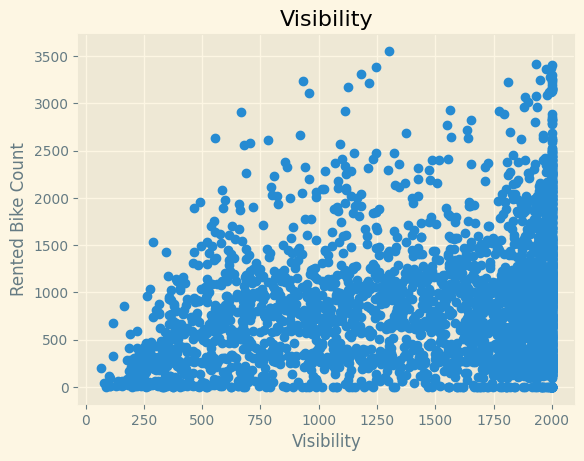

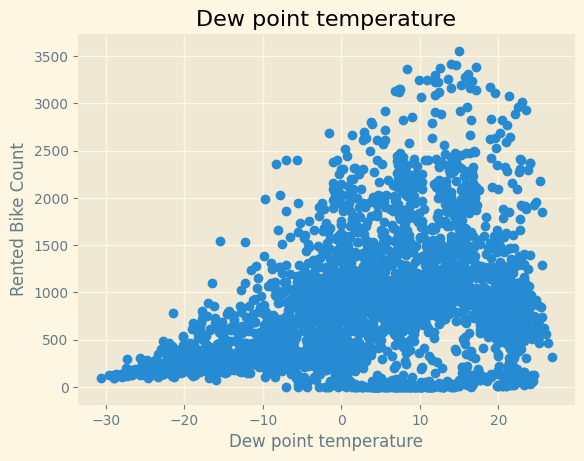

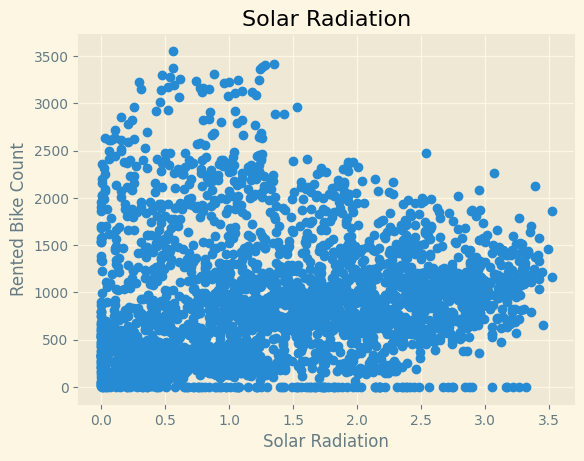

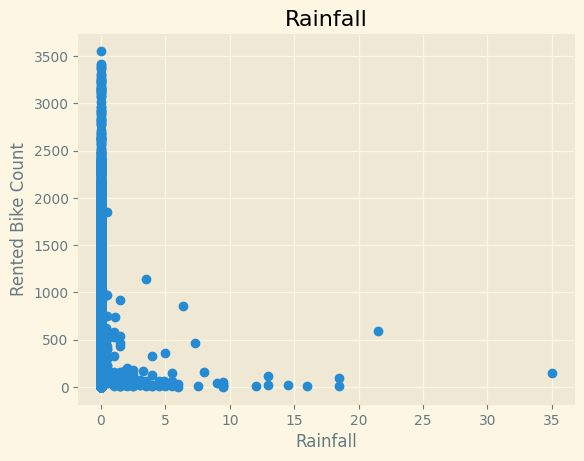

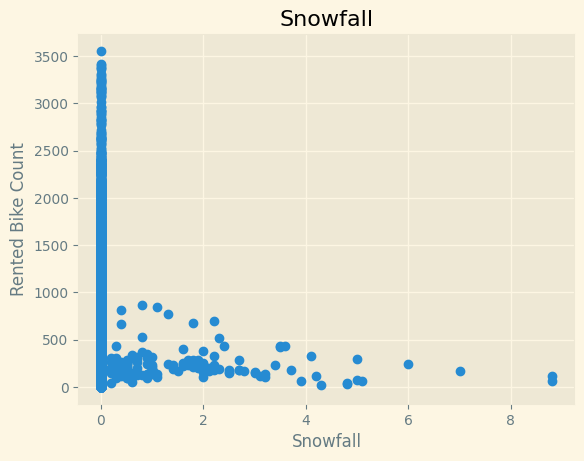

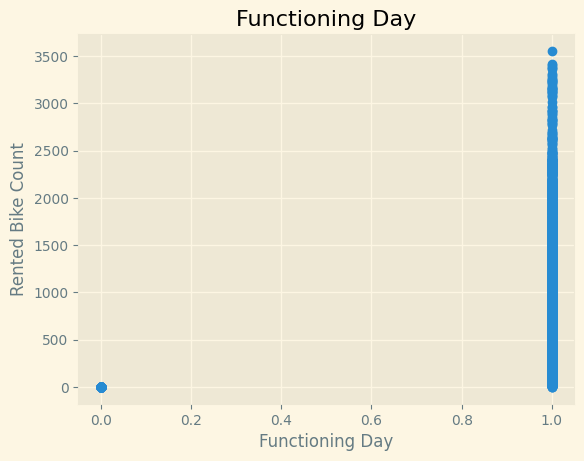

In [11]:
plots(df_noon)

# Get rid of columns that not satisfy Linear Regression

In [12]:
df_clean = df_noon.drop(["Functioning Day", "Wind speed", "Visibility", "Rainfall", "Snowfall"], axis=1)
df_clean.head(2)

,Rented Bike Count,Temperature,Humidity,Dew point temperature,Solar Radiation
10,339,-3.5,24,-21.2,0.65
11,360,-0.5,21,-20.2,0.94


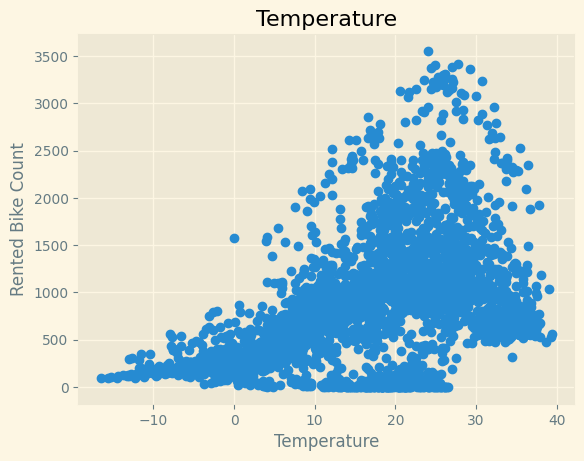

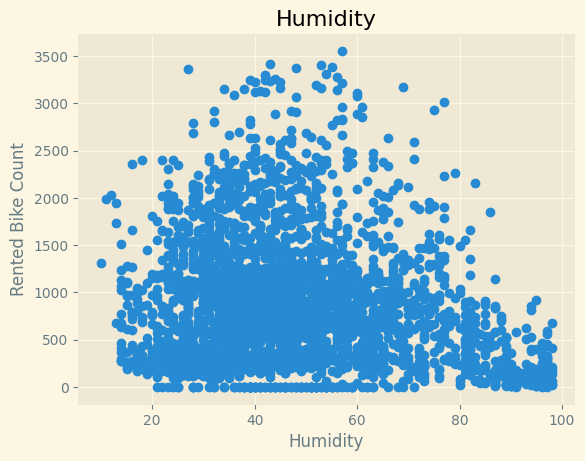

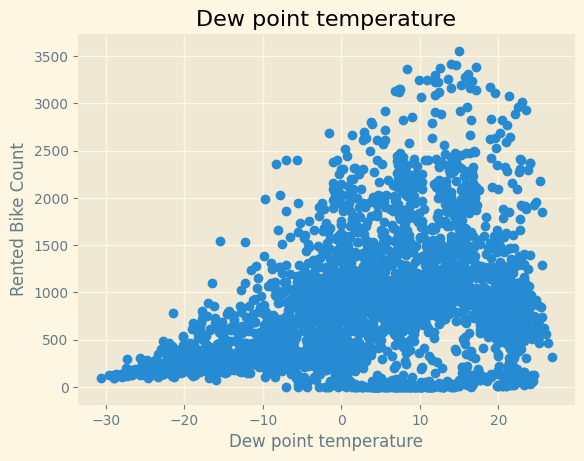

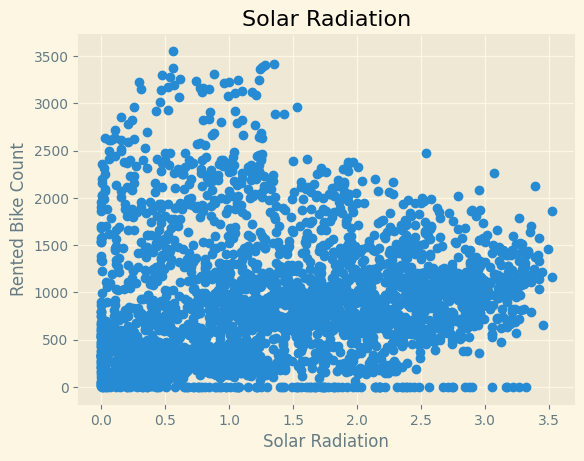

In [13]:
plots(df_clean)

# Train and Test

In [14]:
# MulMultiple Reg
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(["Rented Bike Count"], axis=1), df_clean["Rented Bike Count"], test_size=0.33, random_state=42)


# Simple Reg
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_clean["Temperature"], df_clean["Rented Bike Count"], test_size=0.33, random_state=42)

# Normalization

In [15]:
def normalization(train_data, test_data, all_data):
    # Create a scaler object
    scaler = preprocessing.StandardScaler()

    # Fit the scaler to training data
    scaler.fit(train_data)

    # Transform both training and testing data
    train_norm = scaler.transform(train_data)
    test_norm = scaler.transform(test_data)

    return train_norm, test_norm

In [16]:
X_train, X_test = normalization(X_train, X_test, df_clean.drop(["Rented Bike Count"], axis=1))
# X_train_temp, X_test_temp = normalization(X_train_temp.values.reshape(-1, 1), X_test_temp.values.reshape(-1, 1))

# Linear Regression
## Dataset should have these attributes:
* ### Linearity
* ### Independent: All the samples shouldn't rely in each other
* ### Normality
* ### Homoscedasticity(Spread should be constant)

## Error Calculation:
* ### MAE : Mean Absolute Error => sum(yi - y^i) / n, i in range(0, n)
* ### MSE : Mean Square Error sum((yi - y^i) ^ 2) / n, i in range(0, n)
* ### RMSE: Root Mean Square Error => sqrt(sum((yi - y^i) ^ 2) / n), i in range(0, n)

* ### R2 Coeff of Determination(R2 == 1 => good line):
  * R^2 = 1 - (RSS / TSS)
      * RSS = Sum of Squared Residuals
        * sum((yi - y^i)^2)
      * TSS = Total Sum of Squares
        * sum((yi - mean(y))^2)



### **We use Gradient Descent to find best w and b (y = wx + b)**


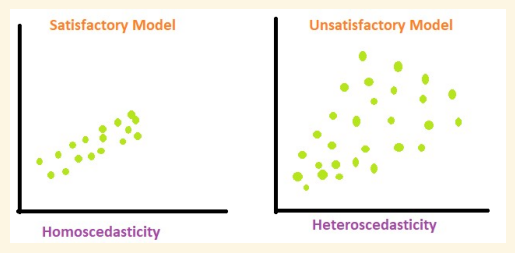

In [17]:
# Load the image
img = Image.open('./homoscedasticity.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: turn off axis
plt.show()

# Single Linear Regression

In [18]:
temp_reg = LinearRegression()

X_train_temp = pd.DataFrame(X_train_temp, columns=["Temperature"])
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [19]:
print(temp_reg.coef_, temp_reg.intercept_)
X_test_temp = pd.DataFrame(X_test_temp, columns=["Temperature"])
print(temp_reg.score(X_test_temp, y_test_temp))

[27.9594049] 414.1728882380206
0.2862170774263961


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


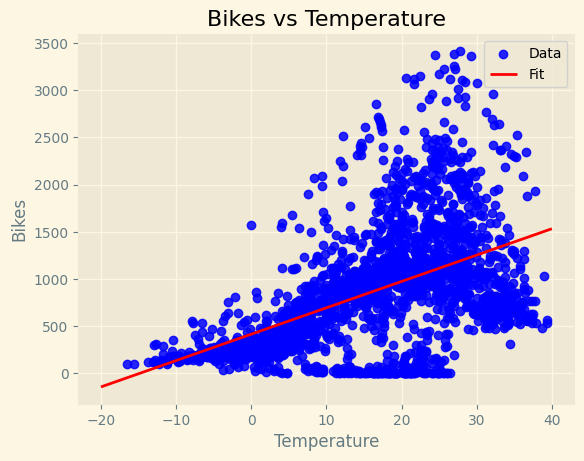

In [20]:
plt.scatter(x=X_train_temp, y=y_train_temp, label="Data", color="blue", alpha=0.85)
x = np.array(tf.linspace(-20, 40, 100)).reshape(-1, 1)
plt.plot(x, temp_reg.predict(x), label="Fit", color="red")
plt.legend()
plt.title("Bikes vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bikes")
plt.show()

# Multiple Linear Regression

In [21]:
mul_reg = LinearRegression()

mul_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
print(mul_reg.coef_, mul_reg.intercept_) # w(s) and b
print(mul_reg.score(X_test, y_test))

[   5.39270766 -492.88366452  551.33873797 -179.14262585] 859.2713636363636
0.41321153859657567


# Regression with NN

In [23]:
def plot_loss(history):
    """Plots training and validation loss."""
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

## Single with NN

In [24]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.values.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [26]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())

In [27]:
# Without extra Denses MSE equal to Linear Regression
history = temp_nn_model.fit(X_train_temp.values.reshape(-1,),
                            y_train_temp,
                            epochs=500,
                            verbose = 0,
                            validation_split=0.2)

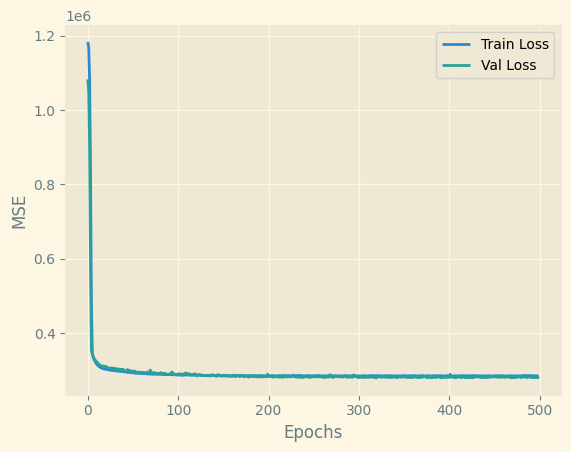

In [28]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


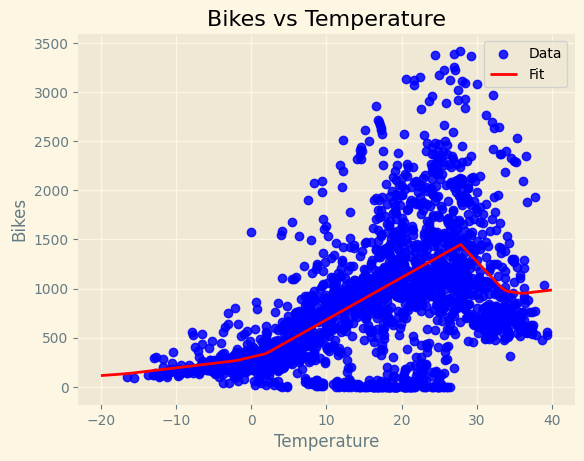

In [29]:
plt.scatter(x=X_train_temp, y=y_train_temp, label="Data", color="blue", alpha=0.85)
x = np.array(tf.linspace(-20, 40, 100)).reshape(-1, 1)
plt.plot(x, temp_nn_model.predict(x), label="Fit", color="red")
plt.legend()
plt.title("Bikes vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bikes")
plt.show()

## Multiple with NN

In [30]:
# axis=-1, which normalizes each feature independentl
nn_normalizer = tf.keras.layers.Normalization(input_shape=(len(X_train[0]), ), axis=-1)
nn_normalizer.adapt(X_train)

In [31]:
# Without extra Denses MSE equal to Linear Regression
nn_model = tf.keras.Sequential([
    nn_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [32]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=tf.keras.losses.MeanSquaredError())

In [33]:
history = nn_model.fit(X_train,
                       y_train,
                       epochs=1000,
                       validation_split=0.2,
                       verbose = 0,
                       )

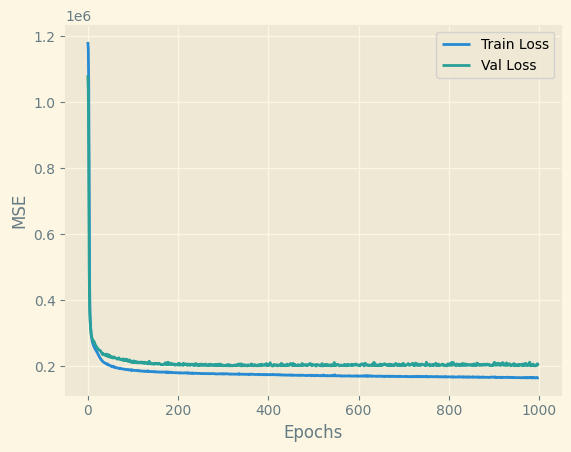

In [34]:
plot_loss(history)

## Evaluating Models

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
# Singles
y_true = y_test_temp
y_pred_temp = temp_reg.predict(X_test_temp)
y_pred_temp_nn = temp_nn_model.predict(X_test_temp)

# Multiples
y_true_mul = y_test
y_pred_mul = mul_reg.predict(X_test)
y_pred_mul_nn = nn_model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [37]:
# Single
mse_single_reg = mean_squared_error(y_true, y_pred_temp)
mse_single_reg_nn = mean_squared_error(y_true, y_pred_temp_nn)

print(f"Mean Squared Error Linear Regression: {mse_single_reg}")
print(f"Mean Squared Error NN: {mse_single_reg_nn}")

# Mul
mse_mul_reg = mean_squared_error(y_true_mul, y_pred_mul)
mse_mul_reg_nn = mean_squared_error(y_true_mul, y_pred_mul_nn)

print(f"Mean Squared Error Linear Regression mul: {mse_mul_reg}")
print(f"Mean Squared Error mul NN: {mse_mul_reg_nn}")

Mean Squared Error Linear Regression: 315400.22600332374
Mean Squared Error NN: 285309.6875
Mean Squared Error Linear Regression mul: 259285.01157674904
Mean Squared Error mul NN: 169355.328125


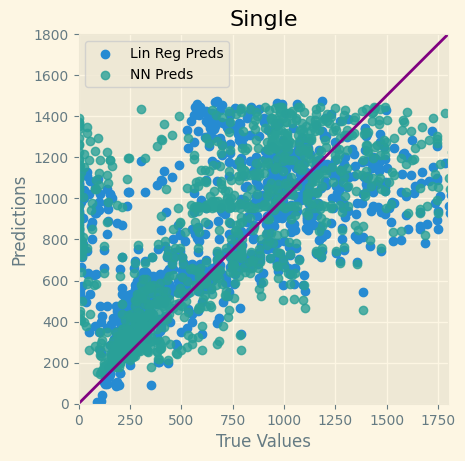

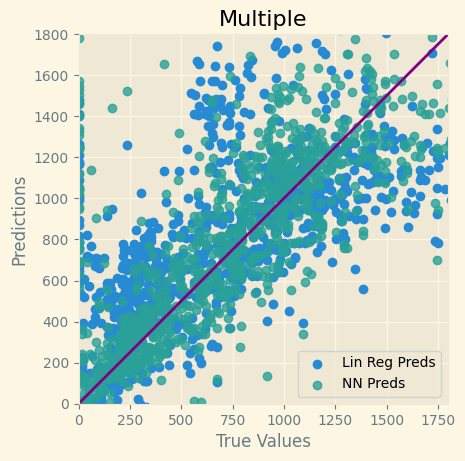

In [38]:
ax = plt.axes(aspect="equal")
plt.scatter(y_true, y_pred_temp, label="Lin Reg Preds")
plt.scatter(y_true, y_pred_temp_nn, label="NN Preds", alpha=0.8)
plt.title("Single")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="purple")
plt.show()

ax2 = plt.axes(aspect="equal")
plt.scatter(y_true_mul, y_pred_mul, label="Lin Reg Preds")
plt.scatter(y_true_mul, y_pred_mul_nn, label="NN Preds", alpha=0.8)
plt.title("Multiple")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="purple")
plt.show()